In [24]:
#allow output from every line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from urllib.request import urlopen
from bs4 import BeautifulSoup
from scipy.special import expit

In [26]:
#Pro Football Focus CSV Import
#2020
PFF_2020 = pd.read_csv("data/PFF_2020TeamData.csv")
PFF_2020['Season'] = '2020'
PFF_2020
##PFF_2020

#2019
PFF_2019 = pd.read_csv("data/PFF_2019TeamData.csv")
PFF_2019['Season'] = '2019'
##PFF_2019

#2018
PFF_2018 = pd.read_csv("data/PFF_2018TeamData.csv")
PFF_2018['Season'] = '2018'
##PFF_2018

#2017
PFF_2017 = pd.read_csv("data/PFF_2017TeamData.csv")
PFF_2017['Season'] = '2017'
##PFF_2017

PFF = pd.concat([PFF_2020,PFF_2019,PFF_2018, PFF_2017])
PFF = PFF.rename(columns={"Team":"School"})
PFF

,Team,Record,PF,PA,Overall,Offense,Pass,Pass_Block,Recv,Run,Run_Block,Defense,Run_Defense,Tackles,Pass_Rush,Cover,SpecialTeams,Season
0,Air Force,3-3,146,90,92,90.7,66,85.5,74.6,81.4,86.9,76.1,70,77,74.4,72,80.8,2020
1,Akron,1-5,103,248,43,50,44.5,14.3,56.5,66.6,55.3,40.9,38.9,51.8,53.9,44.4,72.3,2020
2,Alabama,13-0,630,252,95.2,97.4,94.2,76,93.3,94.2,81.5,90.2,76.3,81.2,84.8,90.3,83.8,2020
3,Appalachian State,9-3,406,240,91,86.2,72.7,79.1,69.2,85.5,85.1,85.3,80.5,84.9,77.8,83.2,85.9,2020
4,Arizona State,2-2,161,93,85.9,80.2,62.1,64.9,65.2,91.8,75.2,71.9,60.9,55.5,69.4,79.8,64.5,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,West Virginia,6-4,265,205,83.8,70.8,72.9,60.3,65.4,74.3,67.1,91.7,90.5,82.5,66.5,92.3,84.5,2020
126,Western Kentucky,5-7,228,304,76.7,72.5,56.1,85.7,59.7,72.8,80.4,73.6,61.6,83.1,69.6,85.8,74.9,2020
127,Western Michigan,4-2,250,205,87.3,89.6,91.1,81,79.7,78,76.2,66,66.6,56.9,83,51.7,81.4,2020
128,Wisconsin,4-3,176,122,86.5,75.8,64.7,70.2,64.7,72.8,78.5,82.6,85.4,62.4,72,70.6,82.8,2020


,School,Record,PF,PA,Overall,Offense,Pass,Pass_Block,Recv,Run,Run_Block,Defense,Run_Defense,Tackles,Pass_Rush,Cover,SpecialTeams,Season
0,Air Force,3-3,146,90,92,90.7,66,85.5,74.6,81.4,86.9,76.1,70,77,74.4,72,80.8,2020
1,Akron,1-5,103,248,43,50,44.5,14.3,56.5,66.6,55.3,40.9,38.9,51.8,53.9,44.4,72.3,2020
2,Alabama,13-0,630,252,95.2,97.4,94.2,76,93.3,94.2,81.5,90.2,76.3,81.2,84.8,90.3,83.8,2020
3,Appalachian State,9-3,406,240,91,86.2,72.7,79.1,69.2,85.5,85.1,85.3,80.5,84.9,77.8,83.2,85.9,2020
4,Arizona State,2-2,161,93,85.9,80.2,62.1,64.9,65.2,91.8,75.2,71.9,60.9,55.5,69.4,79.8,64.5,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,West Virginia,7-6,449,409,86.6,82.5,88.8,87.1,72,69.1,73.9,84.1,83.3,73.2,62.5,87.9,71.1,2017
126,Western Kentucky,6-7,331,349,84.2,76.1,77.8,70.6,76.3,67.3,63.6,89.9,91.1,80,65,87.5,70.4,2017
127,Western Michigan,6-6,407,348,84.9,75.7,63.8,77.7,69.1,70.3,75.2,89.1,91.6,75.3,66.5,80,76.8,2017
128,Wisconsin,13-1,473,195,94.6,91.8,82.6,75.3,86.5,79.8,84.2,94.2,92.9,84.7,81.1,93.3,80.7,2017


In [27]:
#College Sports Reference CSV Import
#2020
SR_Offense_2020 = pd.read_csv("data/2020_OffenseData.csv")
SR_Defense_2020 = pd.read_csv("data/2020_DefenseData.csv")
SR_2020 = pd.merge(SR_Offense_2020, SR_Defense_2020, how = 'inner', on = (['School', 'G']))
SR_2020['Season'] = '2020'
##SR_2020

#2019
SR_Offense_2019 = pd.read_csv("data/2019_OffenseData.csv")
SR_Defense_2019 = pd.read_csv("data/2019_DefenseData.csv")
SR_2019 = pd.merge(SR_Offense_2019, SR_Defense_2019, how = 'inner', on = (['School', 'G']))
SR_2019['Season'] = '2019'
##SR_2019

#2018
SR_Offense_2018 = pd.read_csv("data/2018_OffenseData.csv")
SR_Defense_2018 = pd.read_csv("data/2018_DefenseData.csv")
SR_2018 = pd.merge(SR_Offense_2018, SR_Defense_2018, how = 'inner', on = (['School', 'G']))
SR_2018['Season'] = '2018'
##SR_2018

#2017
SR_Offense_2017 = pd.read_csv("data/2017_OffenseData.csv")
SR_Defense_2017 = pd.read_csv("data/2017_DefenseData.csv")
SR_2017 = pd.merge(SR_Offense_2017, SR_Defense_2017, how = 'inner', on = (['School', 'G']))
SR_2017['Season'] = '2017'
##SR_2017

SR = pd.concat([SR_2020,SR_2019,SR_2018, SR_2017])
SR

,School,G,O.Pts,O.Passing_Cmp,O.Passing_Att,O.Passing_Pct,O.Passing_Yds,O.Passing_TD,O.Rushing_Att,O.Rushing_Yds,...,D.First Downs_Pass,D.First Downs_Rush,D.First Downs_Pen,D.First Downs_Tot,D.Penalties_No.,D.Penalties_Yds,D.Turnovers_Fum,D.Turnovers_Int,D.Turnovers_TO,Season
0,Kent State,4,49.8,22.5,31.5,71.4,323.5,3.5,49.0,289.0,...,7.8,11.3,2.8,21.8,6.5,59.0,0.5,0.8,1.3,2020
1,Alabama,13,48.5,24.9,32.7,76.2,358.2,3.2,36.6,183.6,...,11.0,6.8,2.1,19.9,5.8,45.5,0.8,0.9,1.7,2020
2,Brigham Young,12,43.5,22.8,31.3,72.6,332.1,2.8,34.9,192.1,...,9.6,7.4,1.1,18.1,6.3,58.6,0.6,0.7,1.3,2020
3,Clemson,12,43.5,27.2,40.8,66.5,348.5,2.6,34.3,153.8,...,8.8,5.4,1.8,16.0,6.1,52.2,0.8,1.2,1.9,2020
4,Buffalo,7,43.4,14.0,22.4,62.4,191.0,1.0,43.1,287.1,...,8.7,9.1,2.0,19.9,5.9,53.9,0.6,0.9,1.4,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,San Jose State,13,15.8,17.4,31.9,54.5,198.0,1.2,37.2,120.1,...,9.5,13.2,1.3,24.1,6.4,53.4,0.8,0.5,1.2,2017
126,Illinois,12,15.4,14.0,28.3,49.6,174.8,0.7,32.2,105.6,...,9.1,11.4,1.9,22.4,6.3,58.6,0.8,0.8,1.6,2017
127,Charlotte,12,14.2,12.2,26.0,46.8,136.9,0.8,35.7,166.3,...,11.2,11.0,1.3,23.5,5.0,41.7,0.8,0.2,0.9,2017
128,Kent State,12,12.8,9.5,19.5,48.7,122.7,0.7,43.2,152.5,...,8.1,9.3,2.8,20.1,6.7,55.1,0.6,1.0,1.6,2017


In [28]:
#Join PFF data tables with SR tables
CFBData = pd.merge(SR, PFF, how = 'inner', on = (['School', 'Season']))
move_season = CFBData.pop('Season')
CFBData.insert(1, 'Season', move_season)
CFBData_Full = CFBData.set_index("School")


In [29]:
#Total Plus/Minus Rating based on PFF data
CFBData["PF"] = CFBData["PF"].astype(str).astype(float)
CFBData["PA"] = CFBData["PA"].astype(str).astype(float)
CFBData["Total_PM"] = CFBData["PF"] - CFBData["PA"]
#Average Plus/Minus Rating based on SR data
CFBData["Avg_PM"] = CFBData["O.Pts"] - CFBData["D.Pts"]

In [30]:
CFBData_Full

,Season,G,O.Pts,O.Passing_Cmp,O.Passing_Att,O.Passing_Pct,O.Passing_Yds,O.Passing_TD,O.Rushing_Att,O.Rushing_Yds,...,Pass_Block,Recv,Run,Run_Block,Defense,Run_Defense,Tackles,Pass_Rush,Cover,SpecialTeams
School,,,,,,,,,,,,,,,,,,,,,
Kent State,2020,4,49.8,22.5,31.5,71.4,323.5,3.5,49.0,289.0,...,75.5,76.7,92.2,68.9,57.6,56.6,58.4,64,55.2,64.6
Alabama,2020,13,48.5,24.9,32.7,76.2,358.2,3.2,36.6,183.6,...,76,93.3,94.2,81.5,90.2,76.3,81.2,84.8,90.3,83.8
Clemson,2020,12,43.5,27.2,40.8,66.5,348.5,2.6,34.3,153.8,...,72.1,78.8,82,72.1,88.6,90.1,71.5,78.6,78.4,83.2
Buffalo,2020,7,43.4,14.0,22.4,62.4,191.0,1.0,43.1,287.1,...,85,77.7,90.6,90.2,81.5,70,68.2,86.9,75.3,81.1
Oklahoma,2020,11,43.0,22.6,32.9,68.8,315.0,2.7,38.1,179.7,...,86.3,80,91.7,87,84.1,71.2,56.5,90.8,76,86.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
San Jose State,2017,13,15.8,17.4,31.9,54.5,198.0,1.2,37.2,120.1,...,88.1,60.7,64.5,62.5,77.3,82.4,90.9,54.6,73.1,61.3
Illinois,2017,12,15.4,14.0,28.3,49.6,174.8,0.7,32.2,105.6,...,44.1,61.7,73.3,56,73.4,71.2,77.7,68.6,78,85.1
Charlotte,2017,12,14.2,12.2,26.0,46.8,136.9,0.8,35.7,166.3,...,70.4,55.9,68,65.2,75.9,79.6,87,59.6,72.1,70.4


<IPython.core.display.Javascript object>


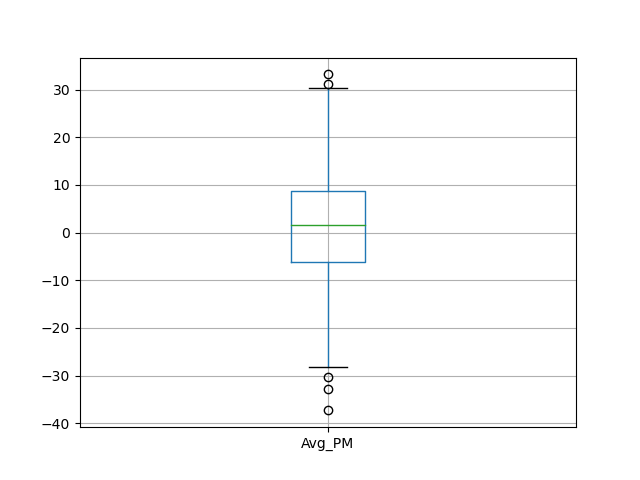

<AxesSubplot:>

In [31]:
###CFBData.boxplot(column = 'Overall')
###CFBData.boxplot(column = 'Total_PM')
CFBData.boxplot(column = 'Avg_PM')

In [32]:
#Selecting statistics that naturally reflect outcome to football games
CFBData_avgselects = CFBData[['O.Total Offense_Plays','O.Total Offense_Yds','D.Turnovers_TO','D.Penalties_Yds']]

<IPython.core.display.Javascript object>


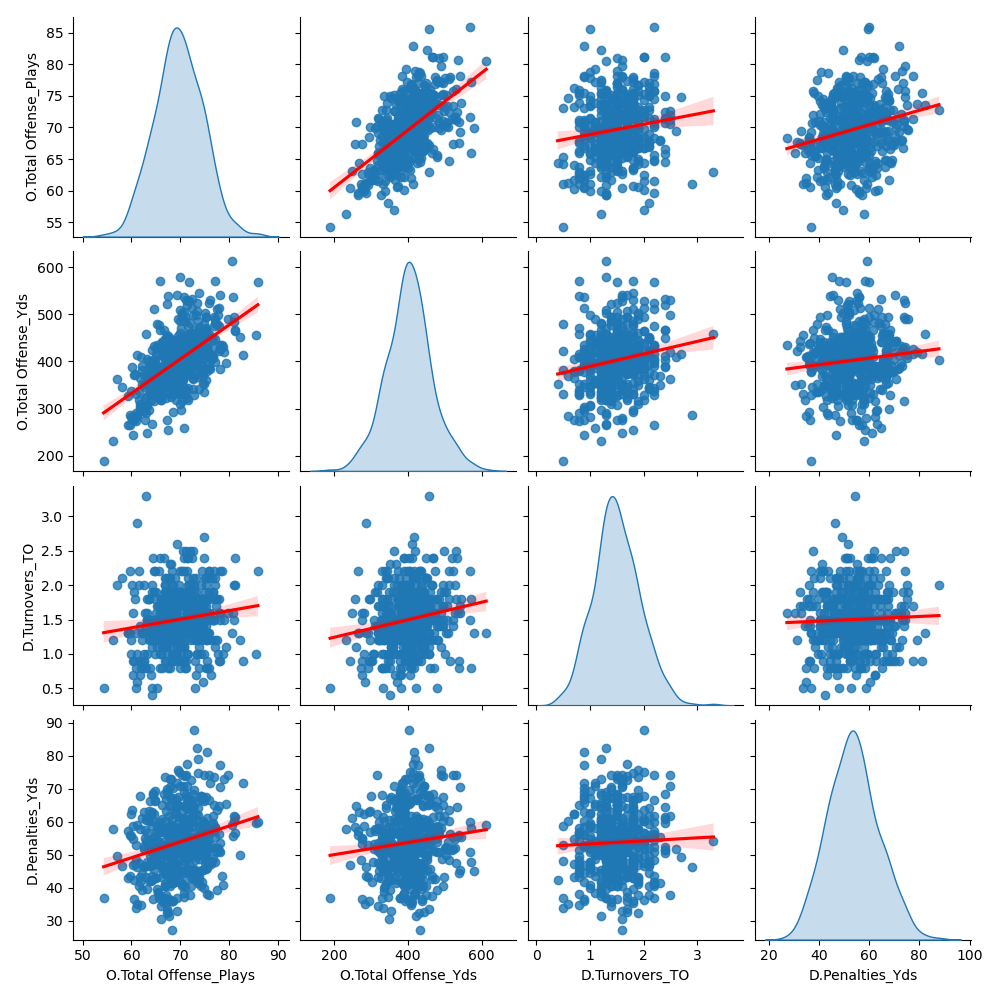

In [33]:
#Creating a Average Stat Pair Plot displaying correlation between metrics
CFBData_avgselects = CFBData[['O.Total Offense_Plays','O.Total Offense_Yds','D.Turnovers_TO','D.Penalties_Yds']]
sns.pairplot(CFBData_avgselects, diag_kind='kde', kind = "reg", plot_kws={'line_kws':{'color':'red'}})

In [34]:
#Display Performance Results based off School 4-year history
CFBData_School_4stat = CFBData[['School','O.Total Offense_Plays','O.Total Offense_Yds','D.Turnovers_TO','D.Penalties_Yds', 'Total_PM', 'Avg_PM']].groupby('School').mean()
CFBData_School_4stat

,O.Total Offense_Plays,O.Total Offense_Yds,D.Turnovers_TO,D.Penalties_Yds,Total_PM,Avg_PM
School,,,,,,
Air Force,69.700,410.700,1.125,41.250,70.75,6.775
Akron,62.150,284.525,1.400,58.750,-158.75,-16.025
Alabama,67.200,504.700,1.750,44.500,378.75,27.600
Appalachian State,68.425,439.300,1.750,52.050,221.25,16.925
Arizona,72.600,439.300,1.275,70.750,-35.75,-6.425
...,...,...,...,...,...,...
West Virginia,71.625,426.625,1.500,59.300,39.50,3.475
Western Kentucky,69.800,359.525,1.175,53.650,-26.50,-2.250
Western Michigan,70.275,438.350,1.475,58.550,41.00,4.275


In [35]:
#Cleaning up PFF Scrape Data
CFBData_Margins = CFBData[['Season', 'G', 'PF','PA', 'Total_PM']].groupby('Season').mean()
round(CFBData_Margins,2)

,G,PF,PA,Total_PM
Season,,,,
2017,12.70,366.80,345.24,21.56
2018,12.74,378.94,349.38,29.57
2019,12.81,374.20,344.28,29.93
2020,8.57,249.59,241.71,7.88


<IPython.core.display.Javascript object>


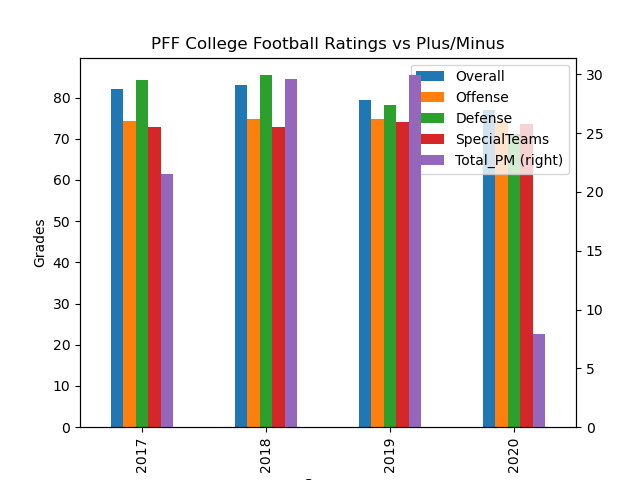

Text(0.5, 1.0, 'PFF College Football Ratings vs Plus/Minus')

Text(0, 0.5, 'Grades')

Text(0.5, 0, 'Season')

,Overall,Offense,Defense,SpecialTeams,Total_PM
Season,,,,,
2017,81.98,74.28,84.28,72.83,21.56
2018,82.97,74.73,85.43,72.92,29.57
2019,79.50,74.83,78.20,73.98,29.93
2020,77.10,74.31,71.12,73.53,7.88


In [36]:
CFBData["Overall"] = CFBData["Overall"].astype(str).astype(float)
CFBData["Offense"] = CFBData["Offense"].astype(str).astype(float)
CFBData["Defense"] = CFBData["Defense"].astype(str).astype(float)
CFBData["SpecialTeams"] = CFBData["SpecialTeams"].astype(str).astype(float)
CFBData_PFF = CFBData[['Season', 'Overall', 'Offense', 'Defense', 'SpecialTeams', 'Total_PM']].groupby('Season').mean()
CFBData_PFF_plot = CFBData_PFF.plot( kind = 'bar', secondary_y = 'Total_PM')
CFBData_PFF_plot.set_title("PFF College Football Ratings vs Plus/Minus")
CFBData_PFF_plot.set_ylabel("Grades")
CFBData_PFF_plot.set_xlabel("Season")
plt.show()

#Showing plot details that describe average rating going down year by year
round(CFBData_PFF,2)

<IPython.core.display.Javascript object>


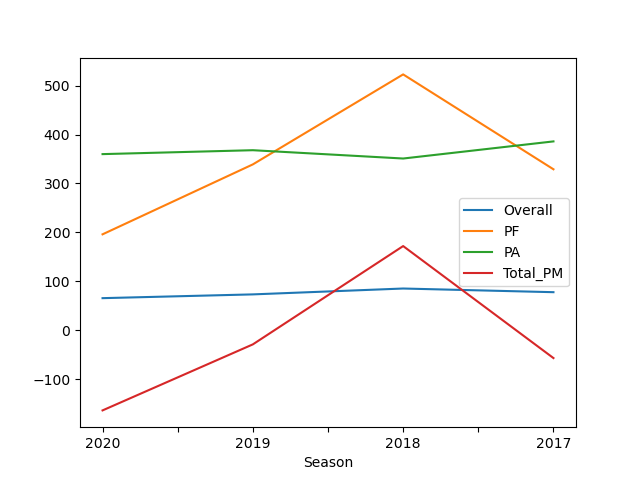

<AxesSubplot:xlabel='Season'>

In [37]:
#Displaying Syracuse Football Data Year-by-Year from PFF
Cuse = CFBData[CFBData.School == "Syracuse"]
Cuse = Cuse.set_index("Season", drop=True)
Cuse[['Overall', 'PF', 'PA', 'Total_PM']].plot()


In [38]:
#Creating Columns with Full Spread Data
CFBData['Full_O_Passing_TD'] = round(CFBData['O.Passing_TD'] * CFBData['G'],0)
CFBData['Full_O_Rushing_TD'] = round(CFBData['O.Rushing_TD'] * CFBData['G'],0)
CFBData['Full_D_Passing_TD'] = round(CFBData['D.Passing_TD'] * CFBData['G'],0)
CFBData['Full_D_Rushing_TD'] = round(CFBData['D.Rushing_TD'] * CFBData['G'],0)
CFBData['Full_O_FirstDown_Total'] = round(CFBData['O.First Downs_Tot'] * CFBData['G'],0)
CFBData['Full_O_Turnovers_Total'] = round(CFBData['O.Turnovers_Tot'] * CFBData['G'],0)
CFBData

,School,Season,G,O.Pts,O.Passing_Cmp,O.Passing_Att,O.Passing_Pct,O.Passing_Yds,O.Passing_TD,O.Rushing_Att,...,Cover,SpecialTeams,Total_PM,Avg_PM,Full_O_Passing_TD,Full_O_Rushing_TD,Full_D_Passing_TD,Full_D_Rushing_TD,Full_O_FirstDown_Total,Full_O_Turnovers_Total
0,Kent State,2020,4,49.8,22.5,31.5,71.4,323.5,3.5,49.0,...,55.2,64.6,47.0,11.8,14.0,13.0,2.0,18.0,129.0,4.0
1,Alabama,2020,13,48.5,24.9,32.7,76.2,358.2,3.2,36.6,...,90.3,83.8,378.0,29.1,42.0,36.0,16.0,16.0,365.0,12.0
2,Clemson,2020,12,43.5,27.2,40.8,66.5,348.5,2.6,34.3,...,78.4,83.2,280.0,23.3,31.0,34.0,17.0,10.0,295.0,16.0
3,Buffalo,2020,7,43.4,14.0,22.4,62.4,191.0,1.0,43.1,...,75.3,81.1,151.0,21.5,7.0,32.0,8.0,10.0,155.0,6.0
4,Oklahoma,2020,11,43.0,22.6,32.9,68.8,315.0,2.7,38.1,...,76,86.6,234.0,21.3,30.0,28.0,12.0,18.0,274.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,San Jose State,2017,13,15.8,17.4,31.9,54.5,198.0,1.2,37.2,...,73.1,61.3,-336.0,-25.9,16.0,6.0,25.0,40.0,224.0,42.0
481,Illinois,2017,12,15.4,14.0,28.3,49.6,174.8,0.7,32.2,...,78,85.1,-193.0,-16.1,8.0,11.0,20.0,28.0,174.0,26.0
482,Charlotte,2017,12,14.2,12.2,26.0,46.8,136.9,0.8,35.7,...,72.1,70.4,-223.0,-18.6,10.0,13.0,18.0,26.0,167.0,20.0
483,Kent State,2017,12,12.8,9.5,19.5,48.7,122.7,0.7,43.2,...,66.4,55.1,-268.0,-22.3,8.0,10.0,19.0,31.0,169.0,26.0


In [39]:
#Model
avgselects_ols_formula = "Avg_PM ~ Q('Full_O_Passing_TD') + Q('Full_O_Rushing_TD') + Q('Full_D_Passing_TD') + Q('Full_D_Rushing_TD') + Q('Full_O_FirstDown_Total') + Q('Full_O_Turnovers_Total') + Q('Overall') + Q('Offense') + Q('Defense') + Q('SpecialTeams')"
avgselects_ols_model = smf.ols(formula = avgselects_ols_formula, data = CFBData).fit()
avgselects_ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Avg_PM   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     877.3
Date:                Tue, 18 May 2021   Prob (F-statistic):          1.83e-298
Time:                        19:06:53   Log-Likelihood:                -1152.6
No. Observations:                 485   AIC:                             2327.
Df Residuals:                     474   BIC:                             2373.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                     -23.6878      2.272    -10.426      0.000     -28.152     -19.223
Q('Full_O_Passing_TD')          0.4345      0.024     17.743      0.000       0.386       0.483
Q('Full_O_Rushing_TD')          0.4328      0.023     19.132      0.000       0.388       0.477
Q('Full_D_Passing_TD')         -0.4326      0.025    -16.999      0.000      -0.483      -0.383
Q('Full_D_Rushing_TD')         -0.4794      0.021    -23.352      0.000      -0.520      -0.439
Q('Full_O_FirstDown_Total')     0.0151      0.005      2.925      0.004       0.005       0.025
Q('Full_O_Turnovers_Total')    -0.1035      0.030     -3.429      0.001      -0.163      -0.044
Q('Overall')                    0.8108      0.078     10.454      0.000       0.658       0.963
Q('Offense')                   -0.3337      0.057     -5.905      0.000      -0.445      -0.223
Q('Defense')                   -0.2276      0.038     -5.988      0.000      -0.302      -0.153
Q('SpecialTeams')               0.0067      0.017      0.380      0.704      -0.028       0.041
==============================================================================
Omnibus:                       38.494   Durbin-Watson:                   1.613
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.934
Skew:                          -0.108   Prob(JB):                     9.29e-37
Kurtosis:                       5.857   Cond. No.                     5.68e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<IPython.core.display.Javascript object>


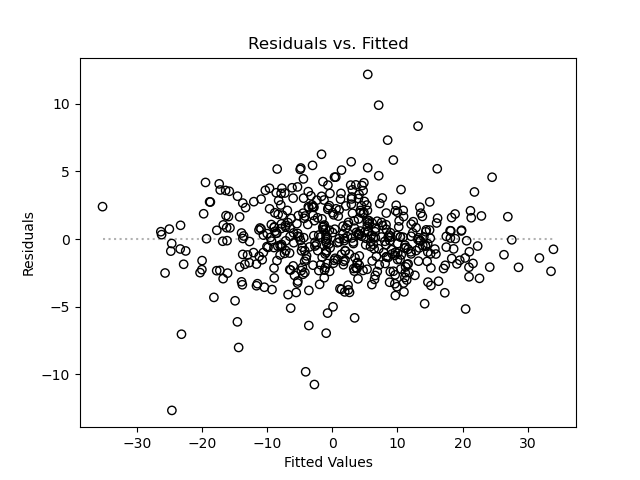

Text(0, 0.5, 'Residuals')

Text(0.5, 0, 'Fitted Values')

Text(0.5, 1.0, 'Residuals vs. Fitted')

In [40]:
#Residuals vs Fitted Plot
residuals = avgselects_ols_model.resid
fitted = avgselects_ols_model.fittedvalues
top2 = abs(residuals).sort_values(ascending = False)[:2]

fig, ax = plt.subplots()
ax.scatter(fitted, residuals, edgecolors = 'k', facecolors = 'none')
ax.set_ylabel('Residuals')
ax.set_xlabel('Fitted Values')
ax.set_title('Residuals vs. Fitted')
ax.plot([min(fitted),max(fitted)],[0,0],color = 'k',linestyle = ':', alpha = .3)
    
plt.show()